# TDT4173: Machine Learning and Case-Based Reasoning - Assignment 3
### Author: Vittorio Triassi 

# Task 2.3 - k-NN vs SVM vs Random Forest on sklearn digit data set

In this task, you are allowed to use library implementations of **[k-NN, SVM,** and **RandomForest]** classifiers and train them on the data set from sklearn for `load_digits`. Do the prediction on the test data and plot the confusion matrix for "target test data" vs "predicted values" for every classifier listed above. Where "target test data" is y label from the test sample and "predicted values" are the result of prediction from individual classifiers. Include the confusion matrix and the used classifier's signature (function name, parameter values, etc.) in the report. Document any exciting findings you may have encountered.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None,cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(6,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[1]))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    ax.set(title=title, ylabel='Target', xlabel='Predicted')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.show()

The first step to carry out is the split of our dataset in training and test examples. In order to do that, we use the `train_test_split` function and decide to have a `split_size = 0.30` which means that our test examples were the 30% of the whole dataset. Then, we flatten our training and test examples, since the `fit` method does not accept 3-D examples. Finally, we proceed by fitting our models and showing the accuracy we get. It turns out that all the classifiers perform really well on unseen examples. The best performance is obtained with the k-NN classifier, followed by the SVC. The RandomForest performs just slightly worse instead. In order to have a better insight on how we are doing on our data, it can be a good idea to plot the *confusion matrix* for each classifier. A confusion matrix is a table that helps us to visualize how our classifier performs on test examples for which we already know the true labels. In our case, we decide to plot both: a normalized and a not normalized version of the confusion matrix.

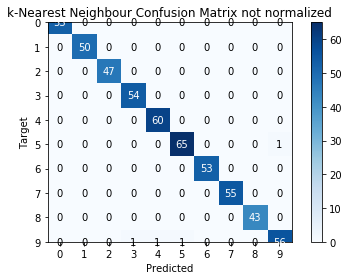

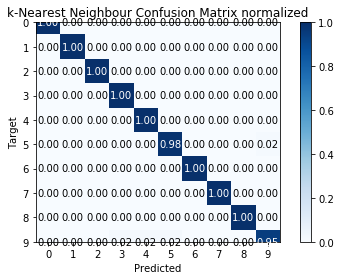

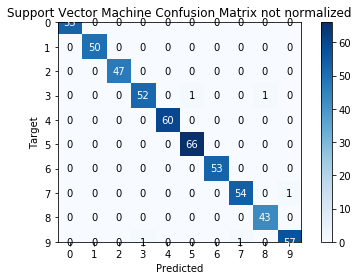

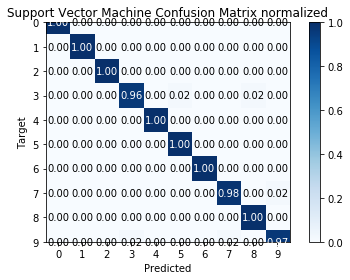

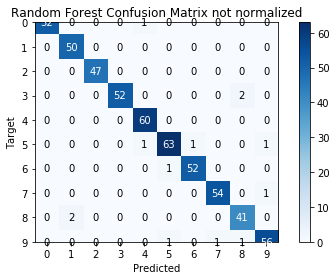

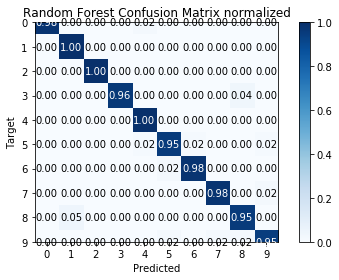

In [3]:
digits = load_digits()

class_names = digits.target_names

X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.30, random_state=42)

X_train = [np.ravel(x) for x in X_train]
X_test = [np.ravel(x) for x in X_test]


classifiers = [[kNN(n_neighbors=5), "k-Nearest Neighbour"],
               [SVC(gamma=0.001), "Support Vector Machine"],
               [RFC(n_estimators=100), "Random Forest"]]

for clf, label in classifiers:
    clf.fit(X_train, y_train)
    print("Accuracy " + label + ": " + str(clf.score(X_test, y_test)))
    plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, title=label+' Confusion Matrix not normalized')
    plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True, title=label+' Confusion Matrix normalized')